# TP2

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Stochastic Gradient Descent para encontrar el máximo de una función


In [179]:
x = np.linspace(-2, 5, 10000)
y = -(x - 2)**2 + 3 # esta es mi funcion loss que debo minimizar, multiplico por -1 para maximizar


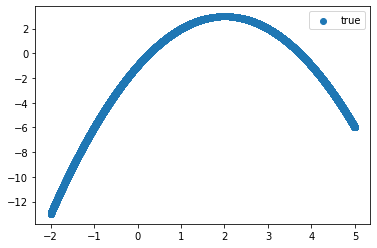

In [180]:
plt.scatter(x, y, label='true')
plt.legend()
plt.show()

In [181]:
def stochastic_gradient_descent(x_0, lr=0.01, epochs=100):
  
        x = x_0 # start point
        # Iterate over the n_epochs

        x_before = 0
        for i in range(epochs):

            grad = 2*x - 4 # grad x -1, para hallar el maximo

            if np.abs(x_before - x) < 0.00001:
              break;
            
            x_before = x
            x = x - (lr * grad) 
            y = -(x - 2)**2 + 3

            
            print("Epoch: {}/{} - loss {:.6f} - x_value {:.6f}, y {:.6f}- gradiente: {:.6f}".format(i+1, epochs, -y, x, y, grad))
        
        return x

In [195]:
stochastic_gradient_descent(100, lr=0.3, epochs=100)

Epoch: 1/100 - loss 1533.640000 - x_value 41.200000, y -1533.640000- gradiente: 196.000000
Epoch: 2/100 - loss 242.862400 - x_value 17.680000, y -242.862400- gradiente: 78.400000
Epoch: 3/100 - loss 36.337984 - x_value 8.272000, y -36.337984- gradiente: 31.360000
Epoch: 4/100 - loss 3.294077 - x_value 4.508800, y -3.294077- gradiente: 12.544000
Epoch: 5/100 - loss -1.992948 - x_value 3.003520, y 1.992948- gradiente: 5.017600
Epoch: 6/100 - loss -2.838872 - x_value 2.401408, y 2.838872- gradiente: 2.007040
Epoch: 7/100 - loss -2.974219 - x_value 2.160563, y 2.974219- gradiente: 0.802816
Epoch: 8/100 - loss -2.995875 - x_value 2.064225, y 2.995875- gradiente: 0.321126
Epoch: 9/100 - loss -2.999340 - x_value 2.025690, y 2.999340- gradiente: 0.128451
Epoch: 10/100 - loss -2.999894 - x_value 2.010276, y 2.999894- gradiente: 0.051380
Epoch: 11/100 - loss -2.999983 - x_value 2.004110, y 2.999983- gradiente: 0.020552
Epoch: 12/100 - loss -2.999997 - x_value 2.001644, y 2.999997- gradiente: 0.0

2.000002693803488



* ¿Cuál es el máximo valor que encontró el algoritmo y para qué valor de x? El maximo valor encontrado es Y=3.000000 para X=2.000003
*  ¿En qué momento detuviste la búsqueda y por qué? 
El criterio de parada fue cuando la diferencia entre un X anterior y el actual sea menor a 0.0001 porque en ese caso se actualiza poco el X.
* ¿Cómo inicializamos los valores random del algoritmo y cómo afectan la convergencia?
Depende  del lr, para lr pequeño demora mas epochs en converger si el valor inicial esta muy lejos del maximo. Para un lr relativamente mas alto como 0.3, converge mucho mas rapido incluso si el X inicial esta muy lejos del valor maximo.
* ¿Cuáles son los hiper parámetros del algoritmo?
El learning rate (lr), número de epochs y valor inicial de X



## Mini-Batch Gradient Descent para entrenar un modelo cuadrático

In [183]:

x = np.linspace(0, 4, 10000).reshape(-1, 1)
y = -(x - 2)**2 + 3 + 0.2 * np.sin(16 * x)

In [184]:
x.shape, y.shape

((10000, 1), (10000, 1))

In [185]:
class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        return NotImplemented

    def predict(self, X):
        return NotImplemented


In [186]:
class LinearRegressionWithGradient(BaseModel):
    """
        :param X: X_train
        :param y: y_train
        :param lr: learning rate
        :param epochs: number of epochs
        :param b: batch size for mini-batch
        :param gradient: type of gradient descent: 'SGD', 'MINI', 'BGD'
    """

    def fit(self, X, y, lr=0.01, epochs=100, b=16, gradient='MINI'):
        X_expanded = np.hstack((np.ones((len(X),1)),X))  # agrega el bias

        if gradient == 'MINI':
            w, h = self.mini_batch_gradient_descent(X_expanded, y, lr, epochs, b)
            self.model = w
            return w, h


    def predict(self, X):
        X_expanded = np.hstack((np.ones((len(X),1)),X))
        return X_expanded.dot(self.model)

    def mini_batch_gradient_descent(self, X, y, lr=0.01, amt_epochs=100, b=16):
        """
        shapes:
            X_train = nxm
            y_train = nx1
            W = mx1
        """
        mse_history = []
        n = X.shape[0]
        m = X.shape[1]

        # initialize random weights
        W = np.random.randn(m).reshape(m, 1)

        # iterate over the n_epochs
        for i in range(amt_epochs):

            # Shuffle all the samples
            idx = np.random.permutation(X.shape[0])
            X_train = X[idx]
            y_train = y[idx]

            # Calculate the batch size in samples as a function of the number of batches
            batch_size = int(len(X_train) / b)


            mse_batch = []
            # Iterate over the batches
            for i in range(0, len(X_train), batch_size):
                end = i + batch_size if i + batch_size <= len(X_train) else len(X_train)
                batch_X = X_train[i: end]  # batch_size*m
                batch_y = y_train[i: end]  # batch_size*1

                # Calculate the prediction for the whole batch
                prediction = np.matmul(batch_X, W)  # batch_sizex1
                # Calculate the error for the whole batch
                error = batch_y - prediction  # batch_sizex1

                # Calculate the gradient for the batch

                # error[batch_sizex1]*batch_X[batch_size*m]--> broadcasting --> batch_size*m
                grad_sum = np.sum(error * batch_X, axis=0)  # 1xm
                grad_mul = -2 / batch_size * grad_sum  # 1xm
                gradient = np.transpose(grad_mul).reshape(m, 1)  # mx1

                # Update the weights
                W = W - (lr * gradient)

                error_batch = np.sum(error**2)
                mse_batch.append(error_batch/len(error))

            mse_history.append(np.mean(mse_batch))

        return W, mse_history

In [187]:
class Metric(object):
    def __call__(self, target, prediction):
        return NotImplemented
        
class MSE(Metric):
    def __init__(self):
        Metric.__init__(self)

    def __call__(self, target, prediction):
        n = target.size
        return np.sum((target - prediction) ** 2) / n

In [188]:
# modelo lineal 
# features x^2, x

x_train = np.hstack((x**2, x))
y_train = y

In [189]:
mse = MSE()
lineal_reg = LinearRegressionWithGradient()

# train
w, mse_hist = lineal_reg.fit(x_train, y_train, lr=0.01, epochs=200, b=32, gradient='MINI')

In [190]:
print(f"Pesos encontrados: {w.tolist()}")

Pesos encontrados: [[-0.9697371511641442], [-0.9951058295945165], [3.971304591727521]]


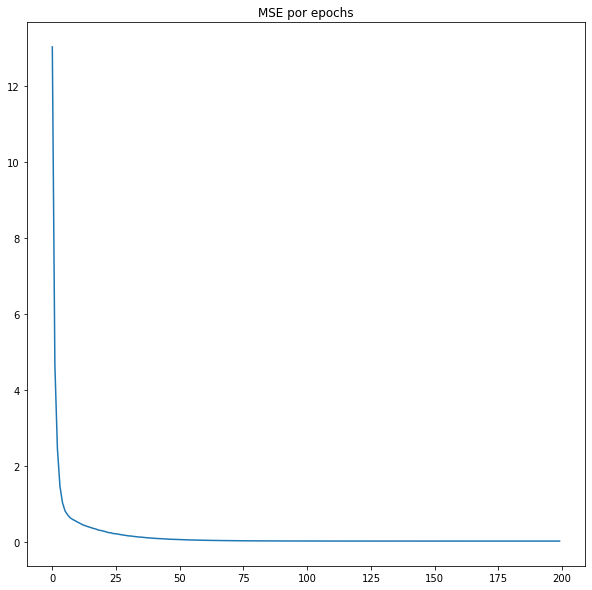

In [191]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))

axs.plot(mse_hist) 
axs.title.set_text('MSE por epochs') 

In [192]:
# test
pred = lineal_reg.predict(x_train)
lr_mse = mse(y_train, pred)

print('W: {}'. format(lineal_reg.model.ravel()))
print('MSE: {} '.format(lr_mse))

W: [-0.96973715 -0.99510583  3.97130459]
MSE: 0.01982522926486839 


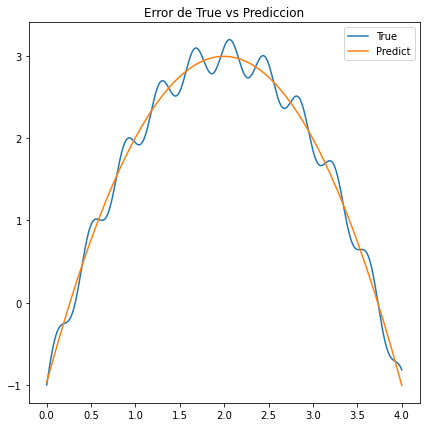

In [193]:
fig, axs = plt.subplots(1, 1, figsize=(7,7))

axs.plot(x, y) 
axs.plot(x, pred)
axs.title.set_text('Error de True vs Prediccion') 
axs.legend(['True', 'Predict'])  


*  Utilizamos un regresion lineal para estimar los pesos de nuestro modelo (implementado en el curso de IA con mini batch)
*  ¿cuál sería la regla de actualización de cada parámetro?.
Los pesos se actualizan en cada batch, de la siguiente manera  W = W - (lr * gradient).



